# Adam - A comparative study on the robust optimisation technique


Adaptive Moment Estimation (Adam) is a method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients  like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients v, similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface.

## 1. Adam in Linear Regression 

Adam optimisation technique is used to fit a line on the set of points randomly generated. The performance of adam optimisation is compared against the normal stochastic gradient descent appraoch to fit the same.fn = 2*x+3 .
Could be generalised to any line y = ax + b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook




#Adam With Normalised Parameters - Conventional
def adam(inits, X, Y, lr=0.1, n_iter=10, beta1=0.9, beta2=0.999, epsilon=1e-6,normalize = True):
    n = len(X)
    a, b = inits
    a_list, b_list = [a], [b]
    grad_func = [lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))]
    v = np.array([0, 0])
    s = np.array([0, 0])
    for _ in range(n_iter):
        t = 1
        for i in range(n):
            x_i, y_i = X[i], Y[i]
            grad = np.array([f(x_i, y_i) for f in grad_func])
            # compute the first moment
            v = beta1 * v + (1-beta1)*grad
            # compute the second moment
            s = beta2*s + (1-beta2)*(grad**2)
            
            # normalisation
            v_norm = v/(1 - np.power(beta1, t))
            s_norm = s/(1 - np.power(beta2, t))
            t += 1
            
            # update gradient
            grad_norm = lr*v_norm/(np.sqrt(s_norm) + epsilon)
            #grad = lr*v/(np.sqrt(s) + epsilon)
            # update params
            a -= grad_norm[0]
            b -= grad_norm[1]
            if ((a-a_list[len(a_list)-1])**2 + (b-b_list[len(b_list)-1])**2) < 0.000000001:
                return a_list, b_list
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list


def stochasticGradientDescent(inits,X,Y,lr=0.01,n_iter=10):
        n = len(X)
        grad_func = [lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))]
        a,b = inits
        a_list, b_list = [a], [b]
        for _ in range(n_iter):
            for i in range(n):
                x_i, y_i = X[i], Y[i]
                grad = np.array([f(x_i, y_i) for f in grad_func])
                a -= lr*grad[0]
                b -= lr*grad[1]
                if ((a-a_list[len(a_list)-1])**2 + (b-b_list[len(b_list)-1])**2) < 0.000000001:
                    return a_list, b_list
                a_list.append(a)
                b_list.append(b)
        return a_list,b_list
    
def fx2(x):
    return 2*x + 3

x_value = np.linspace(-1, 1, 100)
y_value = [fx2(x) for x in x_value]
aAdamList,bAdamList = adam((0.1,0.1),x_value,y_value,lr = 0.1)
aSGDList,bSGDList = stochasticGradientDescent((0.1,0.1),x_value,y_value)
plt.plot(np.arange(1,len(aAdamList)+1,1),aAdamList,label='Convergence of parameter a: using adam ')
plt.plot(np.arange(1,len(bAdamList)+1,1),bAdamList,label='Convergence of parameter b: using adam ')
plt.plot(np.arange(1,len(aSGDList)+1,1),aSGDList,'--',label='Convergence of parameter a: using SGD')
plt.plot(np.arange(1,len(bSGDList)+1,1),bSGDList,'--',label='Convergence of parameter b: using SGD')
plt.legend(loc='lower right', shadow=True, fontsize='small')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')




## 2. Tuning $\alpha$ with $\beta_1$ at 0.9 and $\beta_2$ at 0.999

The learning rate 0.1 achieves the fastest convergence in the loss function for line fitting at $\beta_1 = 0.9$, $\beta_2 = 0.999$. The founders of this algorithm has suggested an optimum value of 0.01 for the learning rate parameter $\alpha$. Thus obtained the appreciable value for learning rate. Similarly other values can also be tuned to get good combinations of hyperparameters for faster convergence.The values $\beta_1$=0.9, $\beta_2$ = 0.999 are robust enough generally and works in majority of usecases

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
x_value = np.linspace(-1, 1, 100)
y_value = [fx2(x) for x in x_value]
lr = np.arange(0.001,0.5,0.0005)
iterations = []
for l in lr:
    aAdamList,bAdamList = adam((0.1,0.1),x_value,y_value,lr = l)
    iterations.append(len(aAdamList))
plt.plot(lr,iterations)
plt.xlabel("Learning Rate")
plt.ylabel("Number of iterations for convergence")
plt.show()



## 3.Comparison of ADAM Against Different Optimisation Techniques on different objective functions

A comparative study of the relevant optimisation techniques, how fast they achieve the minima on log Beale function is carried out.
With the aim of comparing among their performances, the following are generated
- **The absolute error evolution over each iteration**, understanding the error as the absolute difference between the evaluation of the objective function using the parameters given by the optimization algorithm ($J(\hat{\theta_t})$) and the actual optimum value ($J(\theta_{opt})$) i.e. the absolute distance to the optimum only considering the z-axis: $|J(\hat{\theta_z}) - J(\theta_z)|$.
- **The euclidean distance to the minimum of the objective function**, i.e. the $l_2$ norm.
for the following optimization techniques



- ***Gradient Descent***
- ***Gradient Descent with Nesterov Momentum***
- ***RMSProp***
- ***AdaDelta***
- ***Adam***









In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import autograd.numpy as np
from plot_tools import plot_contourf, plot_trajectories, plot_cost_function_3d, plot_contourWithTrajectory,plot_evolution_charts, plot_cinematics_charts
from test_optimization_functions import Himmelblau,Booth,Beale,Ackley,CrossTray,Easom,Goldstein,HolderTable,Matyas,Camel,EggHolder
from matplotlib.animation import FuncAnimation
from optimizers import Optimizer, run_optimizer







def plotMetrics(cost_f,learning_rate = 0.01,iterations = 1500):
    opt = SGD(cost_f=cost_f, lr=learning_rate)
    errors_sgd, distance_sgd,xs_sgd, ys_sgd = run_optimizer(opt=opt, cost_f=cost_f, iterations=iterations)
    opt=SGD_nesterov_momentum(cost_f=cost_f, lr=learning_rate, beta=0.9)
    errors_nesterov, distance_nesterov,xs_nesterov, ys_nesterov = run_optimizer(opt=opt, cost_f=cost_f, iterations=iterations)
    opt = RMSProp(cost_f=cost_f, lr=learning_rate)
    errors_rmsprop, distance_rmsprop,xs_rmsprop, ys_rmsprop = run_optimizer(opt=opt, cost_f=cost_f, iterations=iterations)
    opt = AdaDelta(cost_f=cost_f, lr=learning_rate)
    errors_adadelta, distance_adadelta,xs_adadelta, ys_adadelta = run_optimizer(opt=opt, cost_f=cost_f, iterations=iterations)
    opt = Adam(cost_f=cost_f, lr=learning_rate)
    errors_adam, distance_adam,xs_adam, ys_adam = run_optimizer(opt=opt, cost_f=cost_f, iterations=iterations)
    ############################
    distance_adam
    xMax,xMin = max(xs_adam[np.argmax(distance_adam)],xs_adam[np.argmin(distance_adam)]),min(xs_adam[np.argmax(distance_adam)],xs_adam[np.argmin(distance_adam)])
    yMax,yMin = max(ys_adam[np.argmax(distance_adam)],ys_adam[np.argmin(distance_adam)]),min(ys_adam[np.argmax(distance_adam)],ys_adam[np.argmin(distance_adam)])
    
    
    #############################
    plt.figure(figsize=[18,6])
    plt.plot(errors_sgd, color="b")
    plt.plot(errors_nesterov, color="green")
    plt.plot(errors_rmsprop, color="purple")
    plt.plot(errors_adadelta, color="turquoise")
    plt.plot(errors_adam, color="r")
    plt.title("Error comparison among the optimizers shown above")
    plt.ylabel("error")
    plt.xlabel("time (iterations)")
    plt.legend(labels=["SGD", "SGD + Nesterov Momentum", "RMSProp", "AdaDelta", "Adam"])
    plt.xlim([0,iterations])
    plt.grid()
    plt.show()

    plt.figure(figsize=[18,6])
    plt.plot(distance_sgd, color="b")
    plt.plot(distance_nesterov, color="green")
    plt.plot(distance_rmsprop, color="purple")
    plt.plot(distance_adadelta, color="turquoise")
    plt.plot(distance_adam, color="r")
    plt.title("Distance to the minimum comparison among the optimizers shown above")
    plt.ylabel("distance")
    plt.xlabel("time (iterations)")
    plt.legend(labels=["SGD", "SGD + Nesterov Momentum", "RMSProp", "AdaDelta", "Adam"])
    plt.xlim([0,iterations])
    plt.grid()
    plt.show()
    trajectories_dict={"SGD": (xs_sgd, ys_sgd, "b"),  
                        "SGD + Nesterov": (xs_nesterov, ys_nesterov, "green"),  
                        "RMSprop": (xs_rmsprop, ys_rmsprop, "purple"), 
                        "AdaDelta": (xs_adadelta, ys_adadelta, "turquoise"), 
                        "Adam": (xs_adam, ys_adam, "r")
                       }
    plot_contourWithTrajectory(cost_f,trajectories_dict = trajectories_dict,figsize=[7,7],title = "3D Contour: Global Optima indicated by blue cross")
    #plot_trajectories(trajectories_dict, cost_f, figsize=[10,10], filepath="./img/trajectories.gif", frames=700)



class SGD(Optimizer):
    def __init__(self, cost_f, lr=0.001, x=None, y=None):
        super().__init__(cost_f, lr, x, y)
            
    def step(self, lr = None):
        if not lr:
            lr = self.lr
        f = cost_f.eval(self.x, self.y)
        dx = cost_f.df_dx(self.x, self.y)
        dy = cost_f.df_dy(self.x, self.y)
        self.x = self.x - lr*dx
        self.y = self.y - lr*dy
        return [self.x, self.y]
    

    
class SGD_nesterov_momentum(Optimizer):
    def __init__(self, cost_f, lr=0.001, beta=0.9, x=None, y=None):
        super().__init__(cost_f=cost_f, lr=lr, x=x, y=y, beta=beta)
        self.vx = None
        
    def step(self, lr = None, beta=None):
        f = self.cost_f.eval(self.x, self.y)
        dx = self.cost_f.df_dx(self.x, self.y)
        dy = self.cost_f.df_dy(self.x, self.y)
        
        if type(lr) == type(None):
            lr = self.lr
        if type(beta) == type(None):
            beta = self.beta
        if type(self.vx) == type(None) or type(self.vy)==type(None):
            self.vx = lr * dx
            self.vy = lr * dy
        else:
            dx_in_vx = self.cost_f.df_dx(self.x-beta*self.vx, self.y-beta*self.vy)
            dy_in_vy = self.cost_f.df_dy(self.x-beta*self.vx, self.y-beta*self.vy)
            self.vx = beta * self.vx + lr * dx_in_vx
            self.vy = beta * self.vy + lr * dy_in_vy
        self.x += - self.vx
        self.y += - self.vy
            
        return [self.x, self.y]    



class RMSProp(Optimizer):
    def __init__(self, cost_f, lr=0.001, decay_rate=0.9, x=None, y=None):
        super().__init__(cost_f=cost_f, lr=lr, x=x, y=y, decay_rate=decay_rate)
        self.ms_x = 0
        self.ms_y = 0
        
    def step(self, lr=None, decay_rate=None):
        epsilon = 1e-8
        if not lr:
            lr = self.lr
        if not decay_rate:
            decay_rate = self.decay_rate
        # derivative
        f = self.cost_f.eval(self.x, self.y)
        dx = self.cost_f.df_dx(self.x, self.y)
        dy = self.cost_f.df_dy(self.x, self.y)
        self.ms_x = self.decay_rate * (self.ms_x) + (1-self.decay_rate)*dx**2
        self.ms_y = self.decay_rate * (self.ms_y) + (1-self.decay_rate)*dy**2
        self.x = self.x - (lr/(epsilon + np.sqrt(self.ms_x)))*dx
        self.y = self.y - (lr/(epsilon + np.sqrt(self.ms_y)))*dy
        
        return [self.x, self.y]
            

class AdaDelta(Optimizer):
    def __init__(self, cost_f, lr=0.001, decay_rate=0.9, x=None, y=None):
        super().__init__(cost_f=cost_f, lr=lr, x=x, y=y, decay_rate=decay_rate)
        self.decay_x = 0
        self.decay_y = 0
        self.decay_dx = 1
        self.decay_dy = 1
        
    def step(self, lr=None, decay_rate=None):
        epsilon = 1e-8
        if not lr:
            lr = self.lr
        if not decay_rate:
            decay_rate = self.decay_rate
        # derivative
        f = self.cost_f.eval(self.x, self.y)
        dx = self.cost_f.df_dx(self.x, self.y)
        dy = self.cost_f.df_dy(self.x, self.y)
        # Update decays
        self.decay_x = decay_rate * (self.decay_x) + (1-decay_rate)*dx**2
        self.decay_y = decay_rate * (self.decay_y) + (1-decay_rate)*dy**2
        
        update_x = dx*((np.sqrt(epsilon + self.decay_dx))/(np.sqrt(epsilon + self.decay_x)))
        update_y = dy*((np.sqrt(epsilon + self.decay_dy))/(np.sqrt(epsilon + self.decay_y)))
        
        self.x = self.x - (update_x)*lr
        self.y = self.y - (update_y)*lr
        
        # Update decays d
        self.decay_dx = decay_rate * (self.decay_dx) + (1-decay_rate)*update_x**2
        self.decay_dy = decay_rate * (self.decay_dy) + (1-decay_rate)*update_y**2
        
        return [self.x, self.y]

class Adam(Optimizer):
    def __init__(self, cost_f, lr=0.001, beta_1=0.9, beta_2=0.999, x=None, y=None):
        super().__init__(cost_f, lr, x, y, beta_1=beta_1, beta_2=beta_2)
        self.m_x, self.m_y, self.v_x, self.v_y, self.t  = 0, 0, 0, 0, 0
        
    def step(self, lr = None):
        self.t += 1
        epsilon = 1e-8
        if not lr:
            lr = self.lr
        # derivative
        f = self.cost_f.eval(self.x, self.y)
        dx = self.cost_f.df_dx(self.x, self.y)
        dy = self.cost_f.df_dy(self.x, self.y)
        
        self.m_x = self.beta_1*self.m_x + (1-self.beta_1)*dx
        self.m_y = self.beta_1*self.m_y + (1-self.beta_1)*dy
        self.v_x = self.beta_2*self.v_x + (1-self.beta_2)*(dx**2)
        self.v_y = self.beta_2*self.v_y + (1-self.beta_2)*(dy**2)
        
        m_x_hat = self.m_x/(1-self.beta_1**self.t)
        m_y_hat = self.m_y/(1-self.beta_1**self.t)
        v_x_hat = self.v_x/(1-self.beta_2**self.t)
        v_y_hat = self.v_y/(1-self.beta_2**self.t)

        self.x = self.x - (lr*m_x_hat)/(np.sqrt(v_x_hat)+epsilon)
        self.y = self.y - (lr*m_y_hat)/(np.sqrt(v_y_hat)+epsilon)
        return [self.x, self.y]


Some important functions and the corresponding convergence of adam against the other optimisation techniques are studied in the following subsections

## 3.1 Log Beale Function

<br/><div align="center">$f(x,y) = \displaystyle\frac{\log{\left(1+{(1.5-x+xy)}^2 + {(2.25-x+xy^2)}^2 + {(2.625-x+xy^3)}^2\right)}}{10}$</div>





<IPython.core.display.Javascript object>


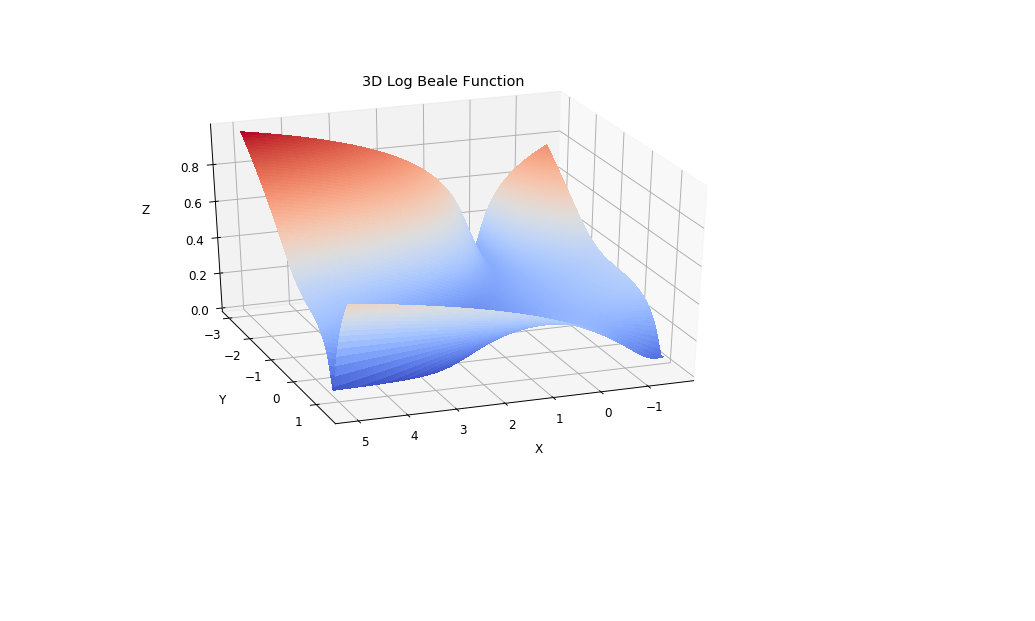

<IPython.core.display.Javascript object>


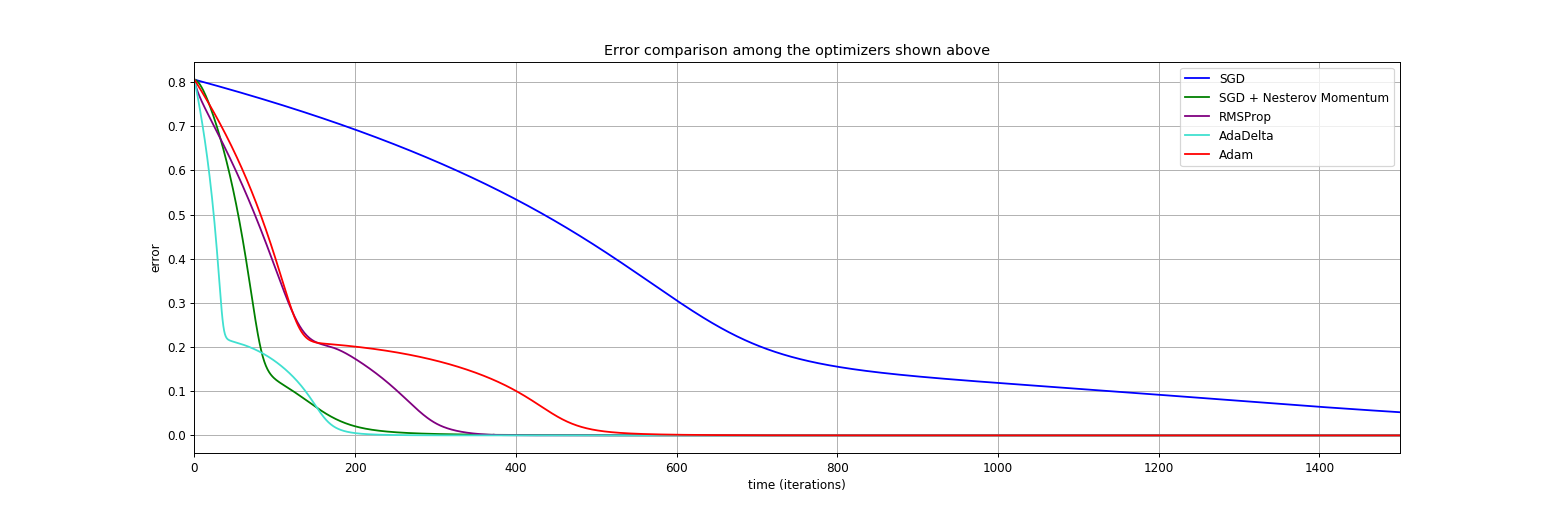

<IPython.core.display.Javascript object>


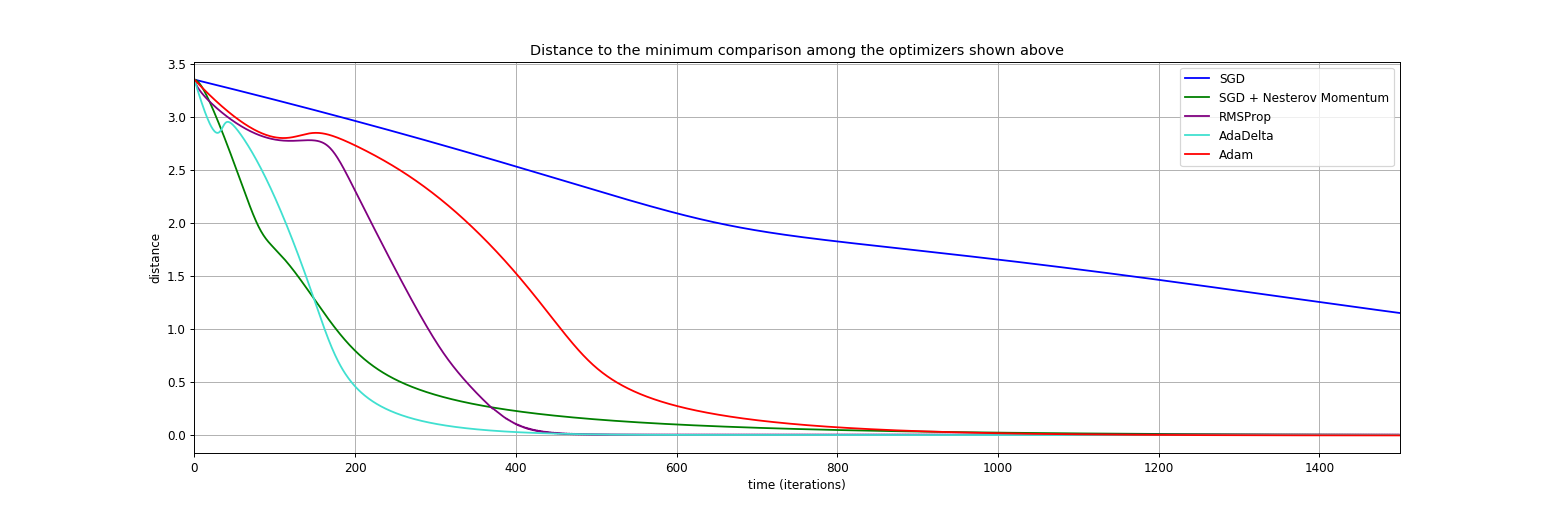

<IPython.core.display.Javascript object>


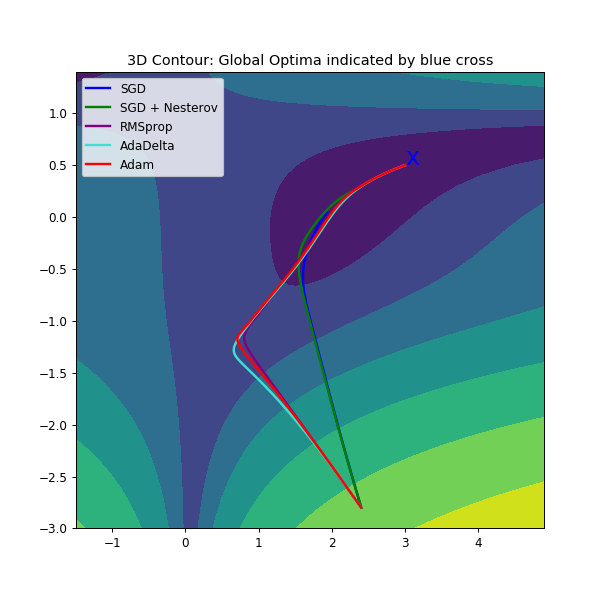

In [15]:
iterations = 1500
learning_rate = 0.01
cost_f = Beale()
plot_cost_function_3d(cost_f,title = "3D Log Beale Function")
plt.show()
plotMetrics(cost_f,learning_rate)


## 3.2 Booth Function

$$f\big(x,y\big) = \big(x + 2y-7\big)^2 + \big(2x +y -5\big)^2$$




In [ ]:
learning_rate = 0.01
cost_f = Booth()
plot_cost_function_3d(cost_f,title = "3D Booth Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)


## 3.3 Ackley Function

$$f\big(x,y\big) = -20\exp{\Big(-0.2\sqrt{0.5\big(x^2 + y^2\big)}\Big)}-\exp{\Big(0.5\big(\cos{2\pi x}+\cos{2\pi y}\big)\Big)} + \exp{\big(1\big)} + 20$$

In [ ]:
learning_rate = 0.01
cost_f = Ackley()
plot_cost_function_3d(cost_f,title = "3D Booth Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)

## 3.4 Cross-in-Tray Function

$$f\big(x,y\big) = -0.0001\bigg(\bigg|\sin{\big(x\big)}\sin{\big(y\big)}\exp{\Big(\Big|100-\frac{\sqrt{x^2 + y^2}}{\pi}\Big|\Big)}\bigg|+1\bigg)^{0.1}$$

In [ ]:
learning_rate = 0.01
cost_f = CrossTray()
plot_cost_function_3d(cost_f,title = "3D Cross In Tray Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)

## 3.5 Easom Function
$$f\big(x,y\big) = - \cos{\big(x\big)}\cos{\big(y\big)}\exp{\Big(-\big(x-\pi \big)^2 - \big(y-\pi \big)^2\Big)}$$

In [ ]:
learning_rate = 0.01
cost_f = Easom()
plot_cost_function_3d(cost_f,title = "3D Booth Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)

## 3.6 Goldstein Function
$$f\big(x,y\big) =\Big[1+\big(x+y+1\big)^2\big(19-14x+3x^2-14y+6xy+3y^2\big)\Big]$$ $\times \Big[30+\big(2x-3y\big)^2\big(18-32x+12x^2+45y-36xy+27y^2\big)\Big] $

In [ ]:
learning_rate = 0.01
cost_f = Goldstein()
plot_cost_function_3d(cost_f,title = "3D Goldstein Function") #
plt.show()
#plotMetrics(cost_f,learning_rate,iterations = 1500) 

## 3.7 Himmelblau Function
$$f\big(x,y\big)=\big(x^2+y-11\big)^2+\big(x+y^2-7\big)^2$$

In [ ]:
learning_rate = 0.01
cost_f = Himmelblau()
plot_cost_function_3d(cost_f,title = "3D Himmelblau Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)

## 3.8 Holder Table
$$f\big(x,y\big)=-\bigg|\sin{\big(x\big)}\cos{\big(y\big)}\exp{\Big(\Big|1-\frac{\sqrt{x^2 + y^2}}{\pi}\Big|\Big)}\bigg|$$

In [ ]:
learning_rate = 0.01
cost_f = HolderTable()
plot_cost_function_3d(cost_f,title = "3D  Holder Table Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)

## 3.9 Matyas Function
$$f\big(x,y\big)=0.26\big(x^2+y^2\big)-0.48xy$$

In [ ]:
learning_rate = 0.01
cost_f = Matyas()
plot_cost_function_3d(cost_f,title = "3D  Matyas Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)

## 3.10 Three-Hump Camel Function
$$f\big(x,y\big)=2x^2 -1.05x^4+\frac{x^6}{6} + xy + y^2$$

In [ ]:
learning_rate = 0.01
cost_f = Camel()
plot_cost_function_3d(cost_f,title = "3D  Camel Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)

## 3.11 Eggholder function
$$f\big(x,y\big)=-\big(y+47\big)\sin{\Bigg(\sqrt{\bigg|y + \frac{x}{2}+47\bigg|}\Bigg)}-x\sin{\bigg(\sqrt{\Big|x-\big(y+47\big)\Big|}\bigg)}$$

In [ ]:
learning_rate = 0.01
cost_f = EggHolder()
plot_cost_function_3d(cost_f,title = "3D  Egg Holder Function")
plt.show()
plotMetrics(cost_f,learning_rate,iterations = 1500)